In [1]:
from examples.hot_cold import init_bprogram, params
from dfs.dfs_bprogram import DFSBProgram
import spot
from buddy import bddtrue, bdd_ithvar
spot.setup()
params["n"] = 3

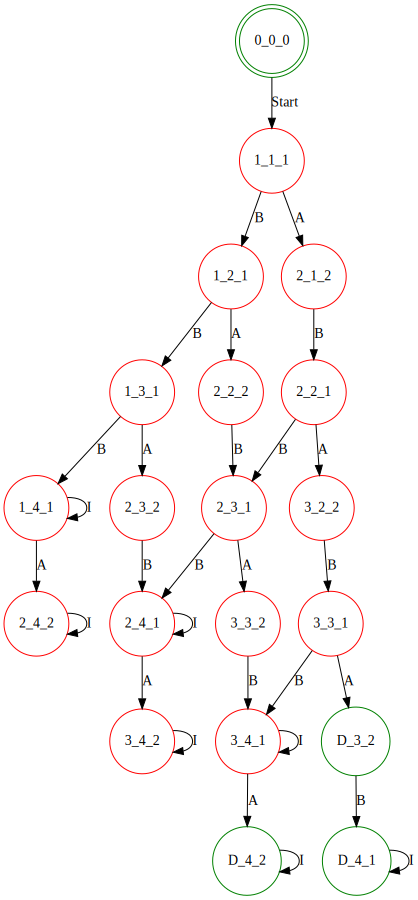

In [2]:
dfs = DFSBProgram(init_bprogram)
(init, states, events), time = dfs.run()
graph = DFSBProgram.save_graph(init, states, "graph.dot")
graph

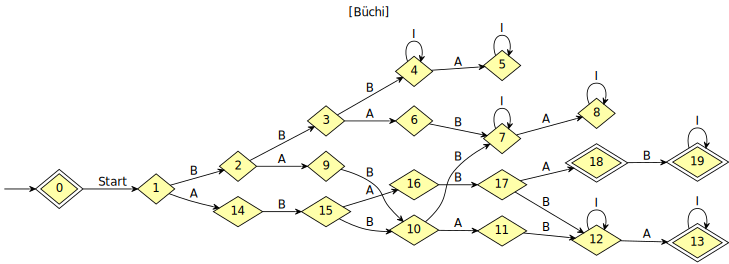

In [3]:
bdict = spot.make_bdd_dict()
game = spot.make_twa_graph(bdict)
game.new_states(len(states))

dict_bdd = {}
for e in events:
    dict_bdd[e.name] = bdd_ithvar(game.register_ap(e.name))


for s1 in states:
    for e, s2 in s1.transitions.items():
        if any(s1.must_finish):
            game.new_edge(states[s1], states[s2], dict_bdd[e.name])
        else:
            game.new_edge(states[s1], states[s2], dict_bdd[e.name], [0])

game.set_init_state(0)
game.set_buchi()
game.prop_state_acc(True)
spot.set_state_players(game, [True]*len(states))
game.show('.')  # Use "g" to hide the irrelevant edge labels.

In [4]:
spot.solve_game(game)

True

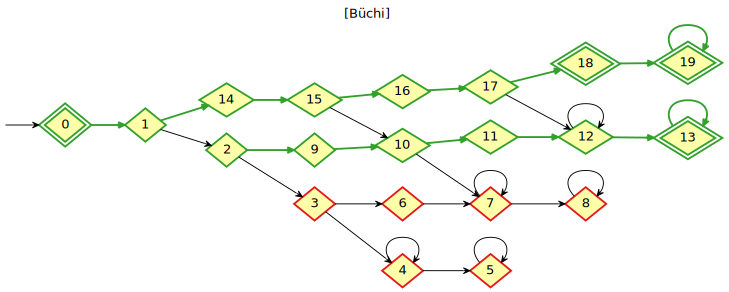

In [5]:
spot.highlight_strategy(game)
game.show('.g')

In [6]:
print(spot.get_state_winners(game))

(True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True)


In [ ]:
for i,b in enumerate(spot.get_state_winners(game)):
    print(i, ":", b)

In [ ]:
from examples.sokoban import init_bprogram, map_settings, pygame_settings
from dfs.dfs_bprogram import DFSBProgram
import spot
from buddy import bddtrue
spot.setup()
from examples.sokoban_pygame.sokoban_maps import maps
map_settings["map"] = maps[0]
pygame_settings["display"] = False

In [ ]:
dfs = DFSBProgram(init_bprogram)
init, states = dfs.run()
graph = DFSBProgram.save_graph(init, states, "graph.dot")
graph

In [ ]:
from bp.spot_ess import SpotESS
import spot
from buddy import bddtrue
from utils import timer

spot.setup()

In [ ]:
with open("hoa_files/ok.hoa", "r") as f:
    aut = spot.parse_aut(f.read())


In [ ]:
for a in spot.automata('hoa_files/error.hoa'):
    display(a)

In [ ]:
for a in spot.automata('automata/e.aut'):
    display(a)

In [ ]:
game.save('automata/e.aut', format='hoa', append=True)